## import module cx_Oracle 

In [1]:
import cx_Oracle
import pandas as pd

## Connect to Oracle Database 

In [2]:
con=cx_Oracle.connect('XE/XE@localhost') # give username and password of Oracle workspace

## Create cursor

In [3]:
cur=con.cursor()

## Execute query

In [4]:
stat=cur.execute('select * from mobile_under_50k')

## Fetch result

In [5]:
results=stat.fetchmany(5)

In [6]:
results

[(55,
  54,
  '"APPLE iPhone 8 Plus (Gold, 64 GB)"',
  '"₹49,900"',
  '"64 GB ROM13.97 cm (5.5 inch) Retina HD Display12MP + 12MP | 7MP Front CameraA11 Bionic Chip with 64-bit Architecture, Neural Engine, Embedded M11 Motion Coprocessor ProcessorBrand Warranty of 1 Year"',
  4.6),
 (56,
  55,
  '"APPLE iPhone 8 Plus (Silver, 64 GB)"',
  '"₹49,900"',
  '"64 GB ROM13.97 cm (5.5 inch) Retina HD Display12MP + 12MP | 7MP Front CameraA11 Bionic Chip with 64-bit Architecture, Neural Engine, Embedded M11 Motion Coprocessor ProcessorBrand Warranty of 1 Year"',
  4.6),
 (57,
  56,
  '"OnePlus 11R 5G (Sonic Black, 256 GB)"',
  '"₹43,429"',
  '16 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Display50MP Rear Camera5000 mAh BatteryDomestic warranty of 12 months on phone & 6 months on accessries',
  4.5),
 (58,
  57,
  '"OnePlus 11R 5G (Galactic Silver, 128 GB)"',
  '"₹38,891"',
  '8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Display50MP Rear Camera5000 mAh BatteryDomestic warranty of 12 months on phone & 6 mo

In [7]:
r=stat.fetchmany(2)

In [8]:
print(r)

[(60, 59, '"OPPO Reno10 Pro 5G (Glossy Purple, 256 GB)"', '"₹39,999"', '12 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Full HD+ Display50MP + 32MP + 8MP | 32MP Front Camera4600 mAh BatterySnapdragon 778G 5G Processor1 Year Manufacturer Warranty for Phone and 6 Months Warranty for In the Box Accessories', 4.3), (61, 60, '"Nothing Phone (2) (Dark Grey, 128 GB)"', '"₹44,999"', '8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Full HD+ Display50 MP(OIS) +50MP | 32MP Front Camera4700 mAh Lithium ion BatteryQualcomm Snapdragon 8+ Gen 1 ProcessorLTPO AMOLED (1 Hz - 120 Hz)1 Year Manufacturing Warranty', 4.4)]


In [9]:
s='select product_name from mobile_under_50k'
r=cur.execute(s)
print(r)

<cx_Oracle.Cursor on <cx_Oracle.Connection to XE@localhost>>


In [10]:
cur.fetchmany(5)

[('"APPLE iPhone 8 Plus (Gold, 64 GB)"',),
 ('"APPLE iPhone 8 Plus (Silver, 64 GB)"',),
 ('"OnePlus 11R 5G (Sonic Black, 256 GB)"',),
 ('"OnePlus 11R 5G (Galactic Silver, 128 GB)"',),
 ('"OnePlus 11R 5G (Sonic Black, 256 GB)"',)]

In [11]:
cur.execute('select prices from mobile_under_50k')

<cx_Oracle.Cursor on <cx_Oracle.Connection to XE@localhost>>

In [12]:
cur.fetchmany(5)

[('"₹49,900"',),
 ('"₹49,900"',),
 ('"₹43,429"',),
 ('"₹38,891"',),
 ('"₹44,400"',)]

In [13]:
cur.execute('select max(prices) from mobile_under_50k')

<cx_Oracle.Cursor on <cx_Oracle.Connection to XE@localhost>>

In [14]:
r=cur.fetchall()

In [15]:
print(r[0][0])

"₹50,983"


In [16]:
stmt=cur.execute('select count(*) from mobile_under_50k')

In [17]:
stmt.fetchone()

(120,)

## Create dataframe using to_sql()

In [18]:
df=pd.read_sql('select * from mobile_under_50k',con)

C:\Users\Pravin Kumar Pathak\AppData\Local\Temp\ipykernel_6672\412768419.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql('select * from mobile_under_50k',con)


In [19]:
df.head()

,ID,MOBILE DATA,PRODUCT_NAME,PRICES,DESCRIPTION,REVIEWS
0,55,54,"""APPLE iPhone 8 Plus (Gold, 64 GB)""","""₹49,900""","""64 GB ROM13.97 cm (5.5 inch) Retina HD Displa...",4.6
1,56,55,"""APPLE iPhone 8 Plus (Silver, 64 GB)""","""₹49,900""","""64 GB ROM13.97 cm (5.5 inch) Retina HD Displa...",4.6
2,57,56,"""OnePlus 11R 5G (Sonic Black, 256 GB)""","""₹43,429""",16 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Disp...,4.5
3,58,57,"""OnePlus 11R 5G (Galactic Silver, 128 GB)""","""₹38,891""",8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Displ...,4.5
4,59,58,"""OnePlus 11R 5G (Sonic Black, 256 GB)""","""₹44,400""",16 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Disp...,4.5


In [20]:
df.describe(include='all')

,ID,MOBILE DATA,PRODUCT_NAME,PRICES,DESCRIPTION,REVIEWS
count,120.000000,120.000000,120,120,120,120.000000
unique,NaN,NaN,104,47,70,NaN
top,NaN,NaN,"""OnePlus 10R 5G (Sierra Black, 256 GB)""","""₹49,999""",64 GB ROM15.49 cm (6.1 inch) Liquid Retina HD ...,NaN
freq,NaN,NaN,4,19,5,NaN
mean,60.500000,59.500000,NaN,NaN,NaN,4.286667
std,34.785054,34.785054,NaN,NaN,NaN,0.194864
min,1.000000,0.000000,NaN,NaN,NaN,3.800000
25%,30.750000,29.750000,NaN,NaN,NaN,4.200000
50%,60.500000,59.500000,NaN,NaN,NaN,4.300000
75%,90.250000,89.250000,NaN,NaN,NaN,4.400000


In [23]:
df['PRICES']=df['PRICES'].str.replace('₹','').str.replace(',','').str.replace('"','')
df.head()

,ID,MOBILE DATA,PRODUCT_NAME,PRICES,DESCRIPTION,REVIEWS
0,55,54,"""APPLE iPhone 8 Plus (Gold, 64 GB)""",49900,"""64 GB ROM13.97 cm (5.5 inch) Retina HD Displa...",4.6
1,56,55,"""APPLE iPhone 8 Plus (Silver, 64 GB)""",49900,"""64 GB ROM13.97 cm (5.5 inch) Retina HD Displa...",4.6
2,57,56,"""OnePlus 11R 5G (Sonic Black, 256 GB)""",43429,16 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Disp...,4.5
3,58,57,"""OnePlus 11R 5G (Galactic Silver, 128 GB)""",38891,8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Displ...,4.5
4,59,58,"""OnePlus 11R 5G (Sonic Black, 256 GB)""",44400,16 GB RAM | 256 GB ROM17.02 cm (6.7 inch) Disp...,4.5


In [24]:
df['PRICES']=pd.to_numeric(df['PRICES'])

In [25]:
df["PRICES"].dtype

dtype('int64')

In [26]:
df['REVIEWS'].dtype

dtype('float64')

In [27]:
from matplotlib import pyplot as plt

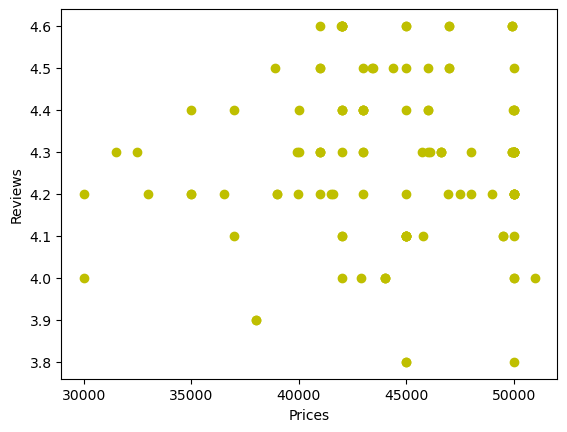

In [28]:
plt.scatter(df['PRICES'],df['REVIEWS'],c=['y'])
plt.xlabel('Prices')
plt.ylabel('Reviews')
plt.show()

In [29]:
cur.execute('select product_name from mobile_under_50k where reviews=(select max(reviews) from mobile_under_50k)')

<cx_Oracle.Cursor on <cx_Oracle.Connection to XE@localhost>>

In [30]:
cur.fetchone()[0]

'"APPLE iPhone 8 Plus (Gold, 64 GB)"'

In [31]:
df['PRICES'].describe()

count      120.000000
mean     44287.108333
std       4870.870848
min      30000.000000
25%      41986.750000
50%      44990.000000
75%      49499.000000
max      50983.000000
Name: PRICES, dtype: float64

In [32]:
df['PRICES'].idxmax()

80

In [33]:
df.at[80,'PRODUCT_NAME']

'"OnePlus 10T 5G (Moonstone Black, 256 GB)"'

In [34]:
df.loc[80,'PRODUCT_NAME']

'"OnePlus 10T 5G (Moonstone Black, 256 GB)"'

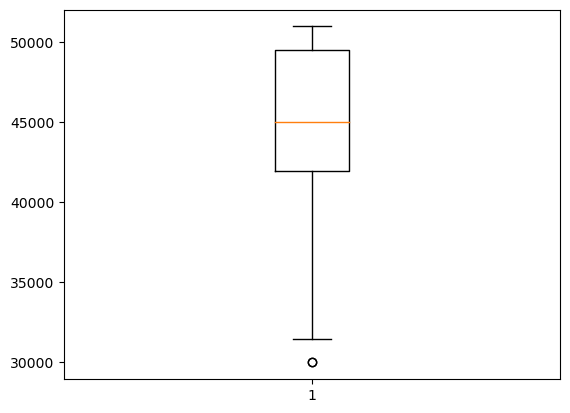

In [35]:
plt.boxplot(df['PRICES'])
plt.show()

## close cursor

In [36]:
cur.close()

## close connection

In [37]:
con.close()